In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import xarray as xr
import numpy as np
import cmocean
import re

path_features = Path("/home/jupyter-daniela/suyana/peru_production/features/")


archivos = [
    f for f in path_features.glob("hycom_*.nc")
    if re.match(r"hycom_(1ra|2da)-\d{4}\.nc$", f.name)
]

def orden_temporada(f):
    m = re.match(r"hycom_(1ra|2da)-(\d{4})\.nc$", f.name)
    if m:
        temporada, anio = m.groups()
        orden_t = 0 if temporada == "1ra" else 1
        return int(anio), orden_t
    return (9999, 9)

archivos_ordenados = sorted(archivos, key=orden_temporada)


[PosixPath('/home/jupyter-daniela/suyana/peru_production/features/hycom_2da-2015.nc'),
 PosixPath('/home/jupyter-daniela/suyana/peru_production/features/hycom_1ra-2016.nc'),
 PosixPath('/home/jupyter-daniela/suyana/peru_production/features/hycom_2da-2016.nc'),
 PosixPath('/home/jupyter-daniela/suyana/peru_production/features/hycom_1ra-2017.nc'),
 PosixPath('/home/jupyter-daniela/suyana/peru_production/features/hycom_2da-2017.nc'),
 PosixPath('/home/jupyter-daniela/suyana/peru_production/features/hycom_1ra-2018.nc'),
 PosixPath('/home/jupyter-daniela/suyana/peru_production/features/hycom_2da-2018.nc'),
 PosixPath('/home/jupyter-daniela/suyana/peru_production/features/hycom_1ra-2019.nc'),
 PosixPath('/home/jupyter-daniela/suyana/peru_production/features/hycom_2da-2019.nc'),
 PosixPath('/home/jupyter-daniela/suyana/peru_production/features/hycom_1ra-2020.nc'),
 PosixPath('/home/jupyter-daniela/suyana/peru_production/features/hycom_2da-2020.nc'),
 PosixPath('/home/jupyter-daniela/suyana/pe

In [20]:
anios

[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

In [25]:
axes

array([<Axes: title={'left': '1ra 2016'}>,
       <Axes: title={'left': '2da 2016'}>], dtype=object)

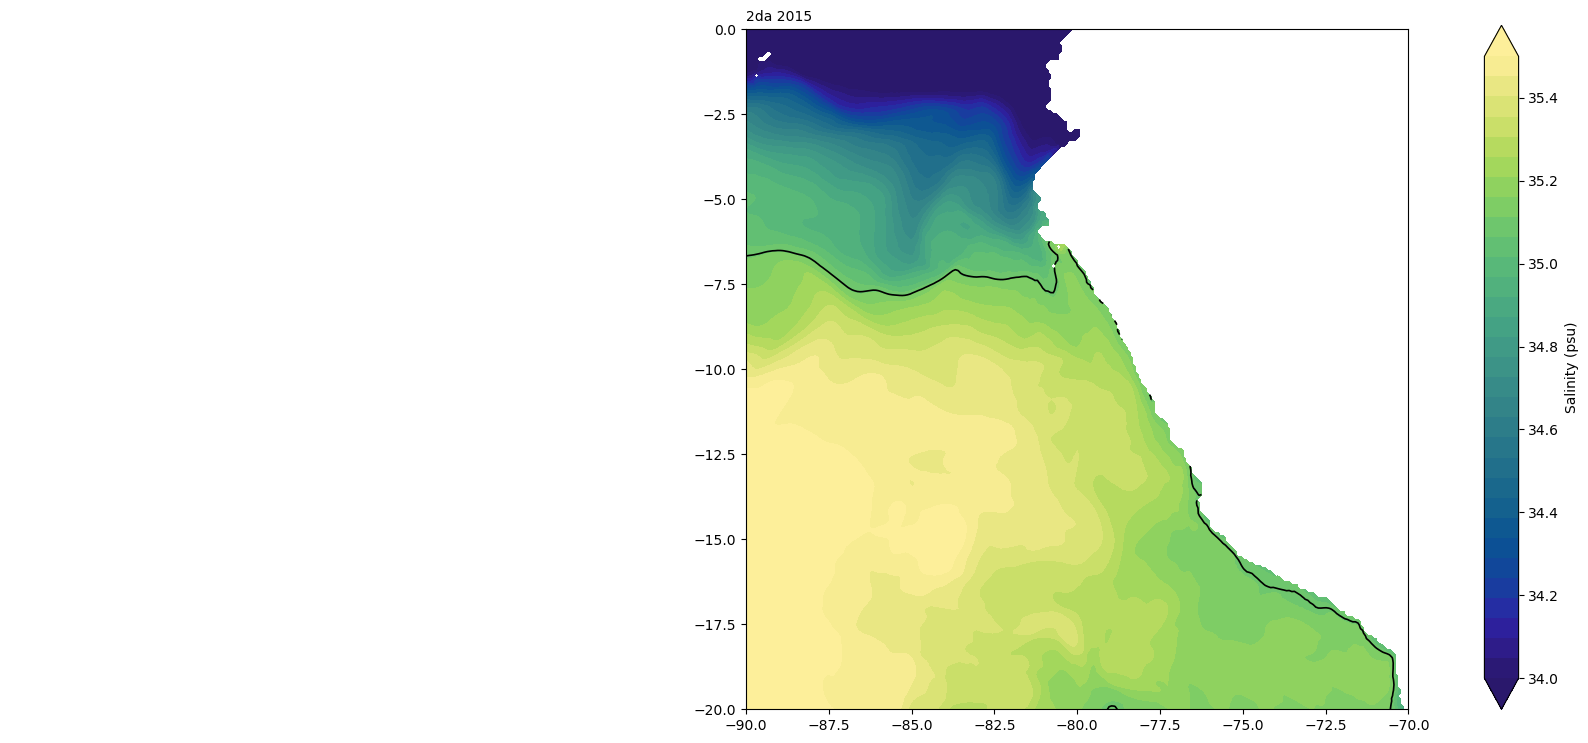

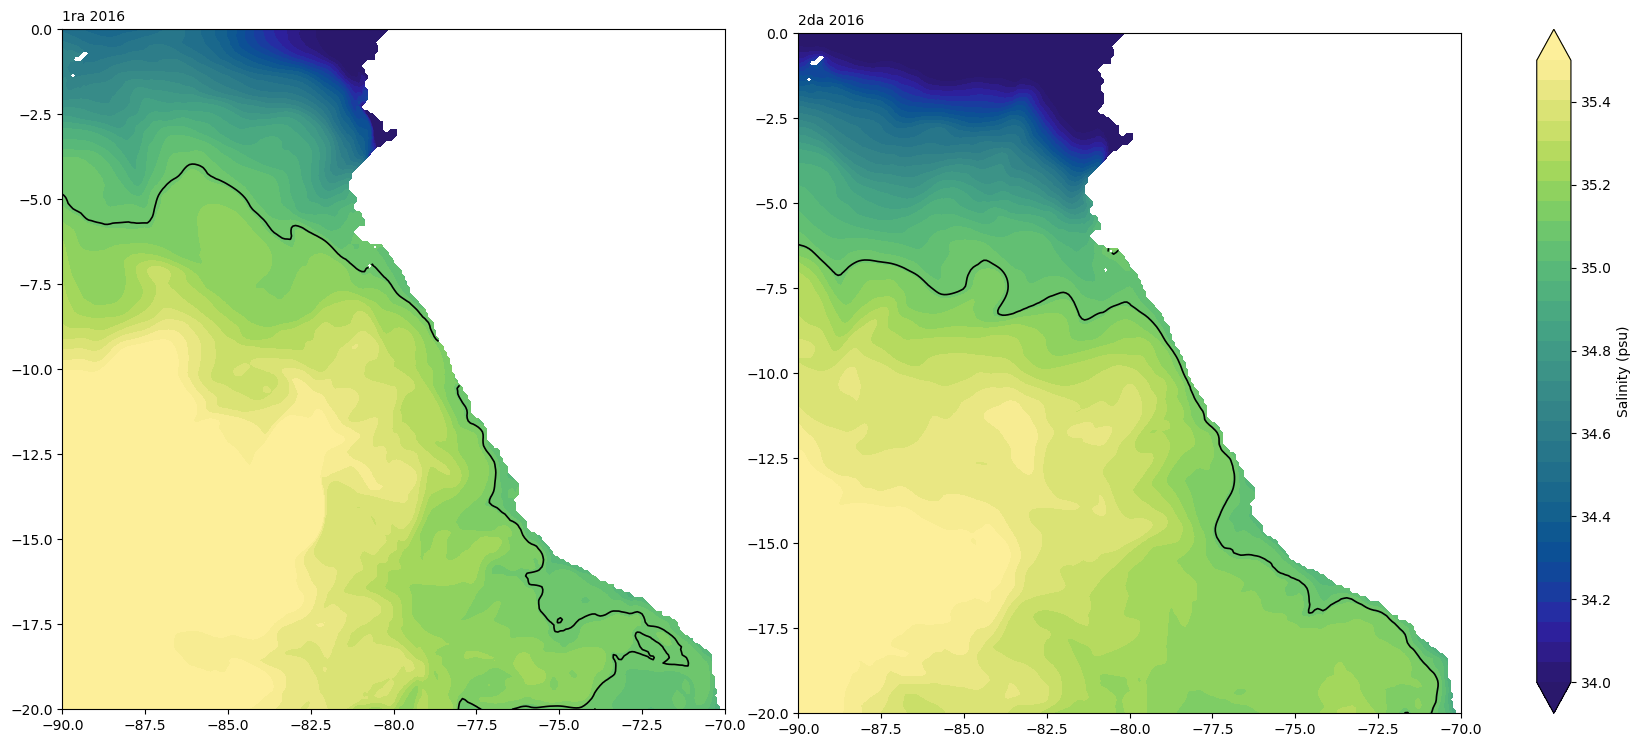

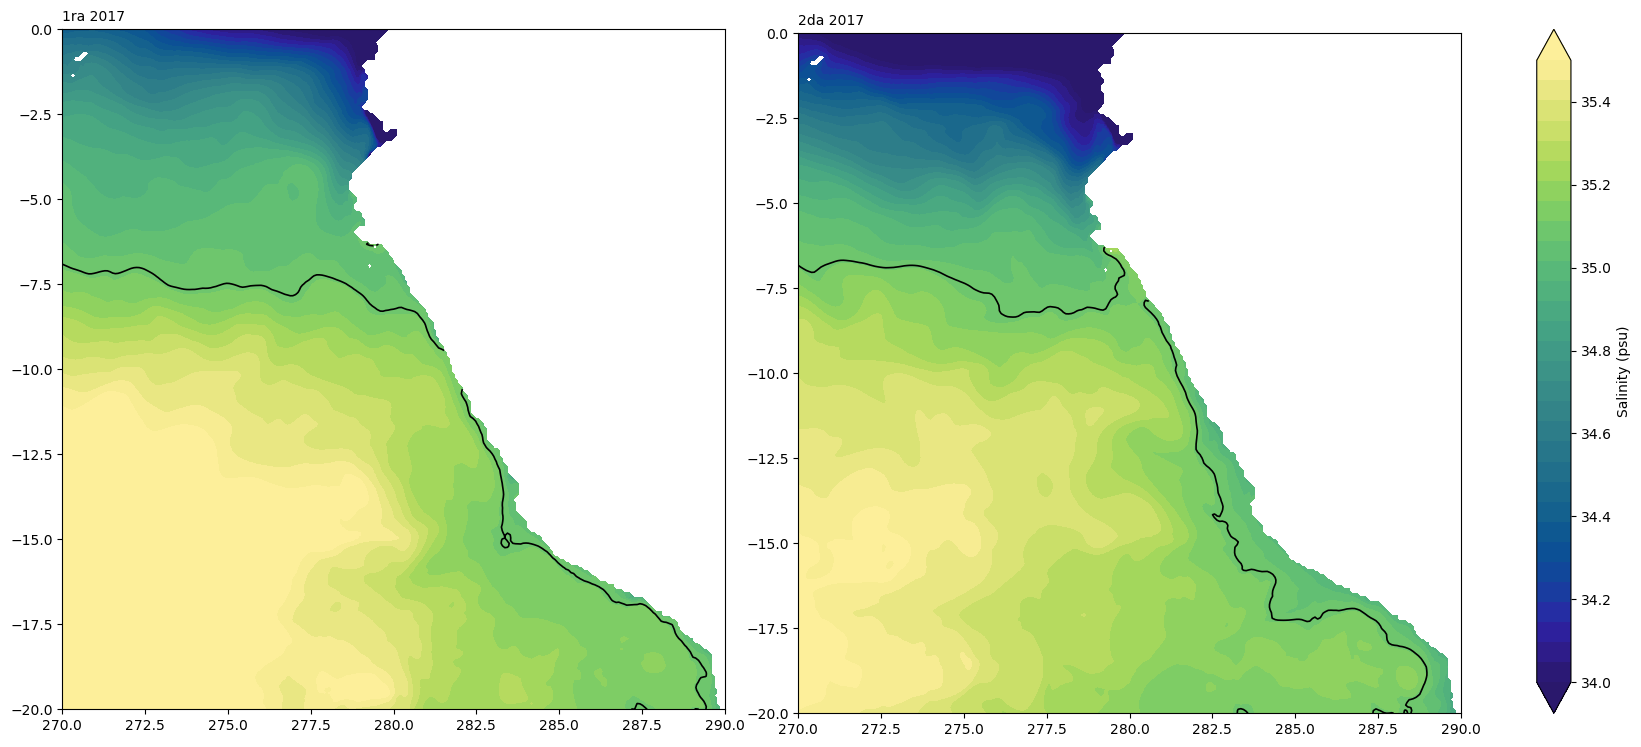

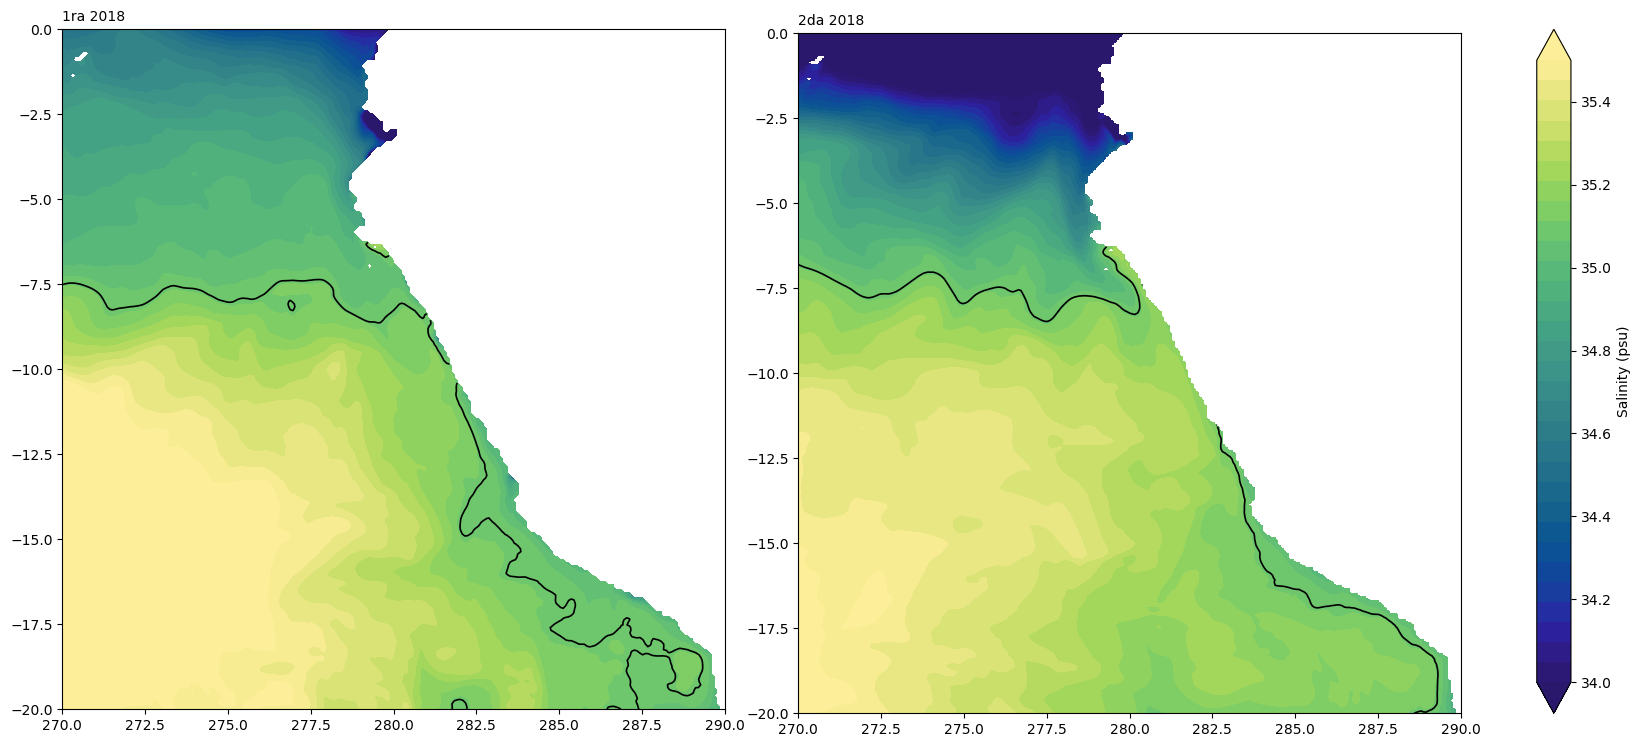

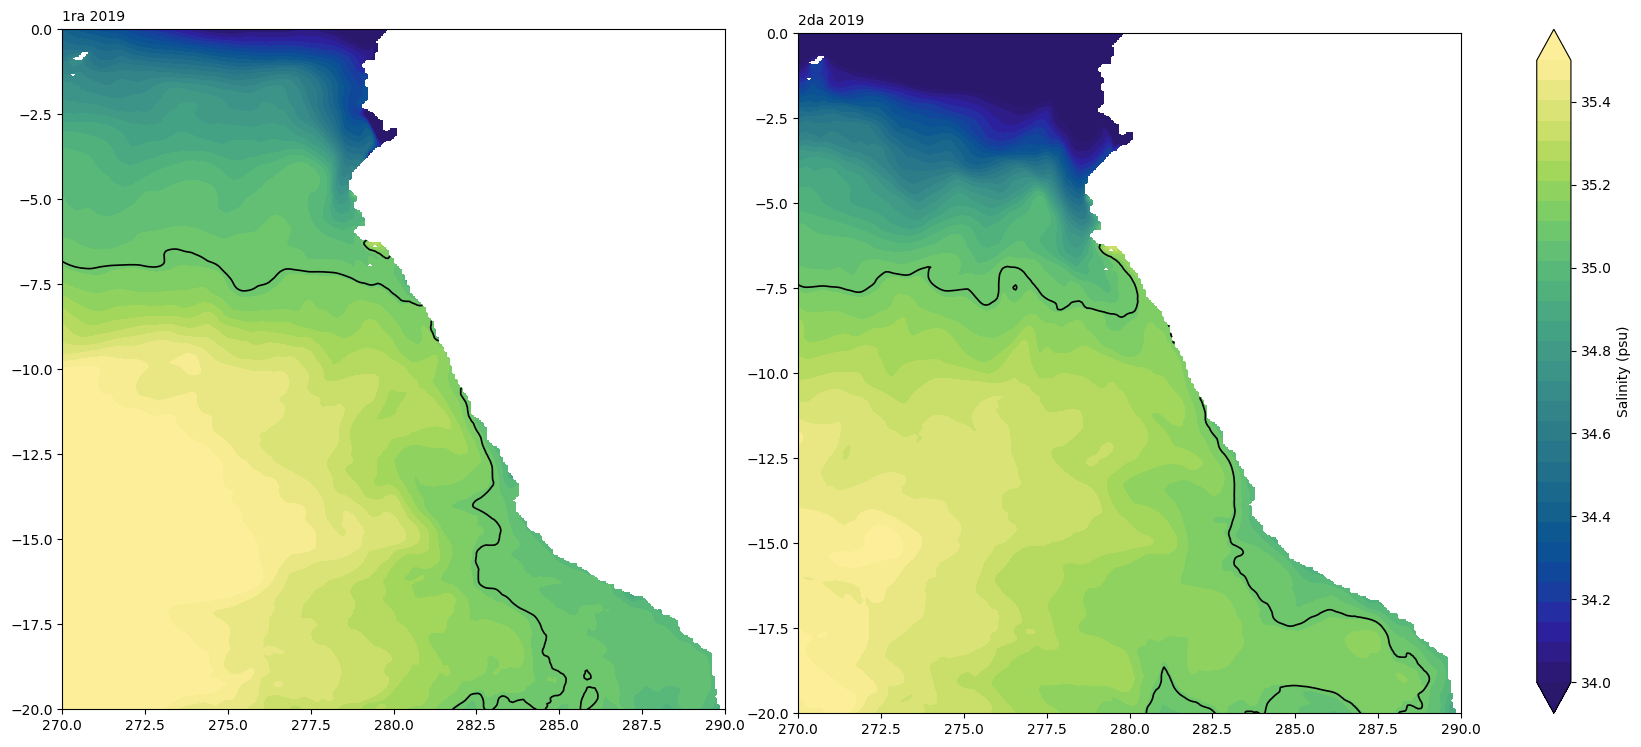

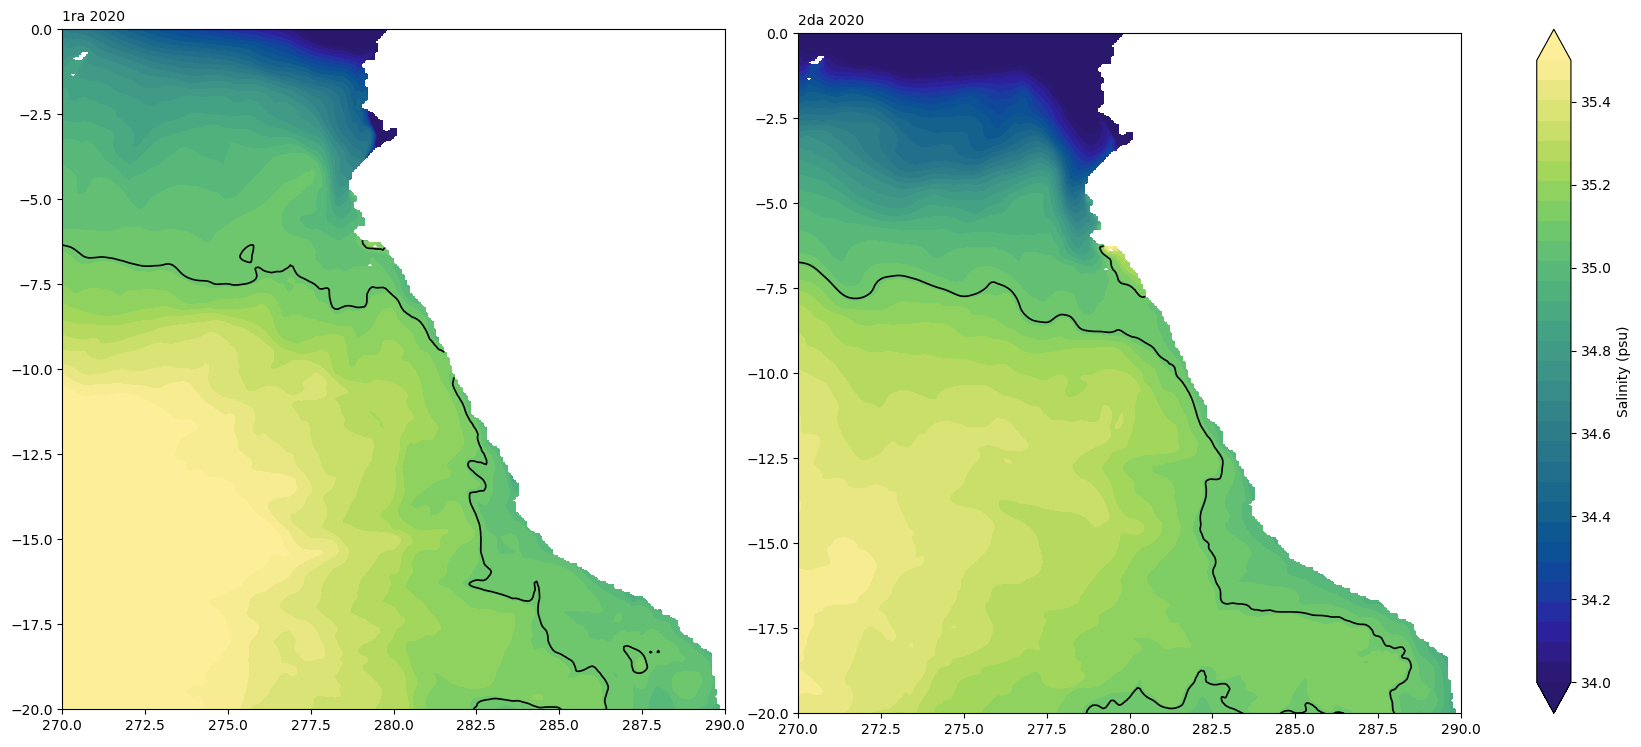

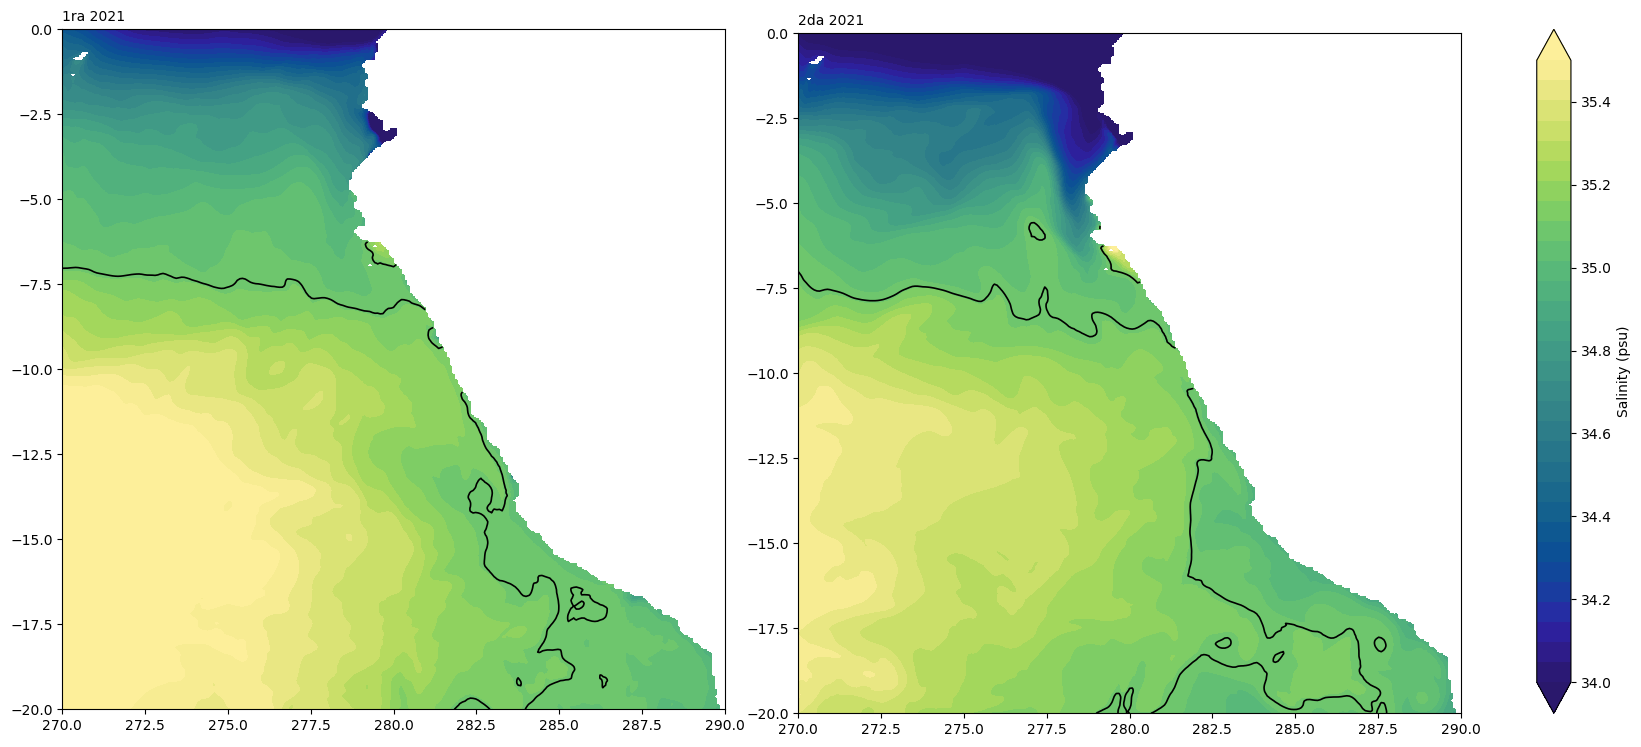

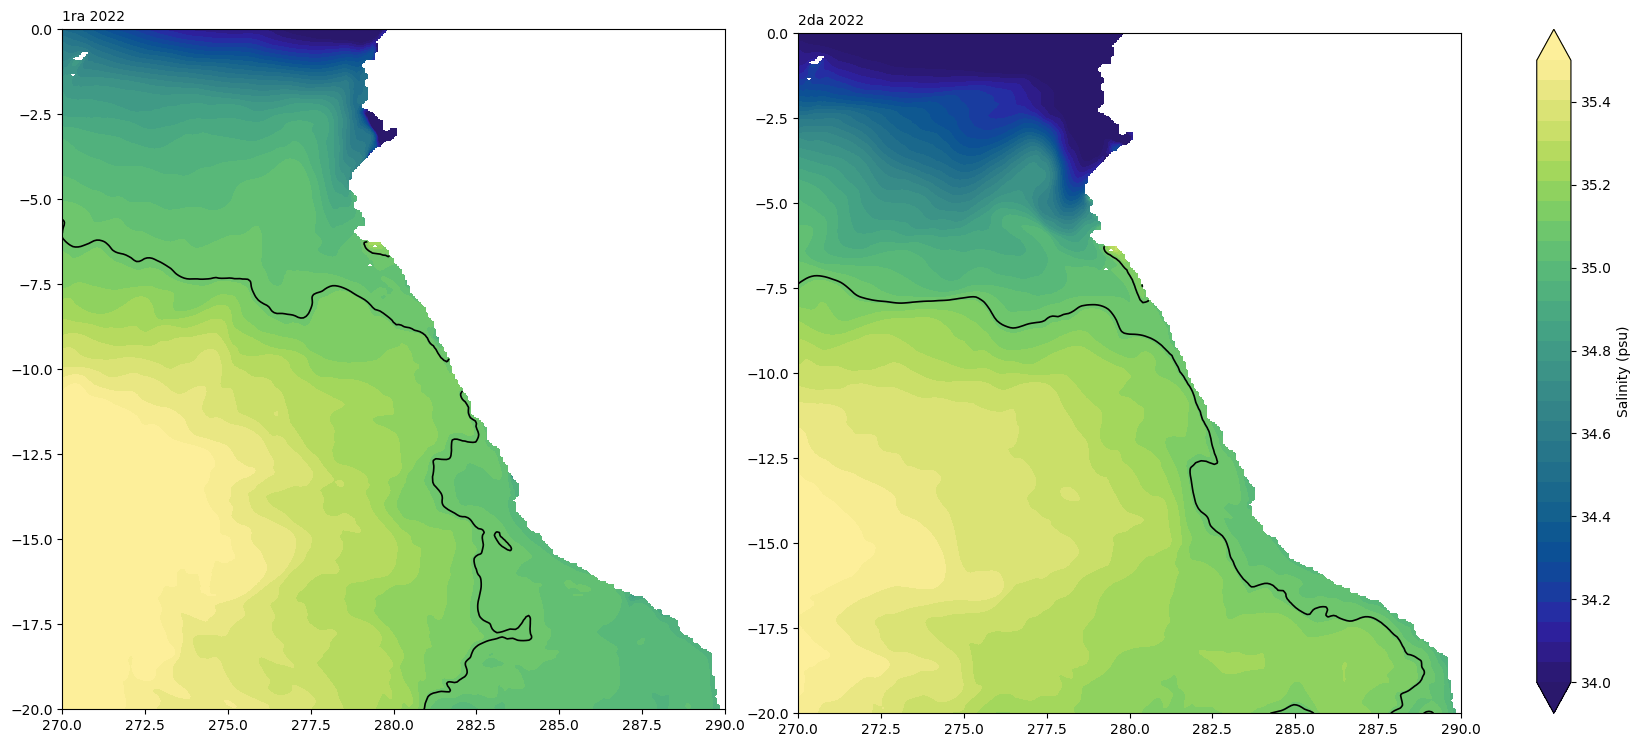

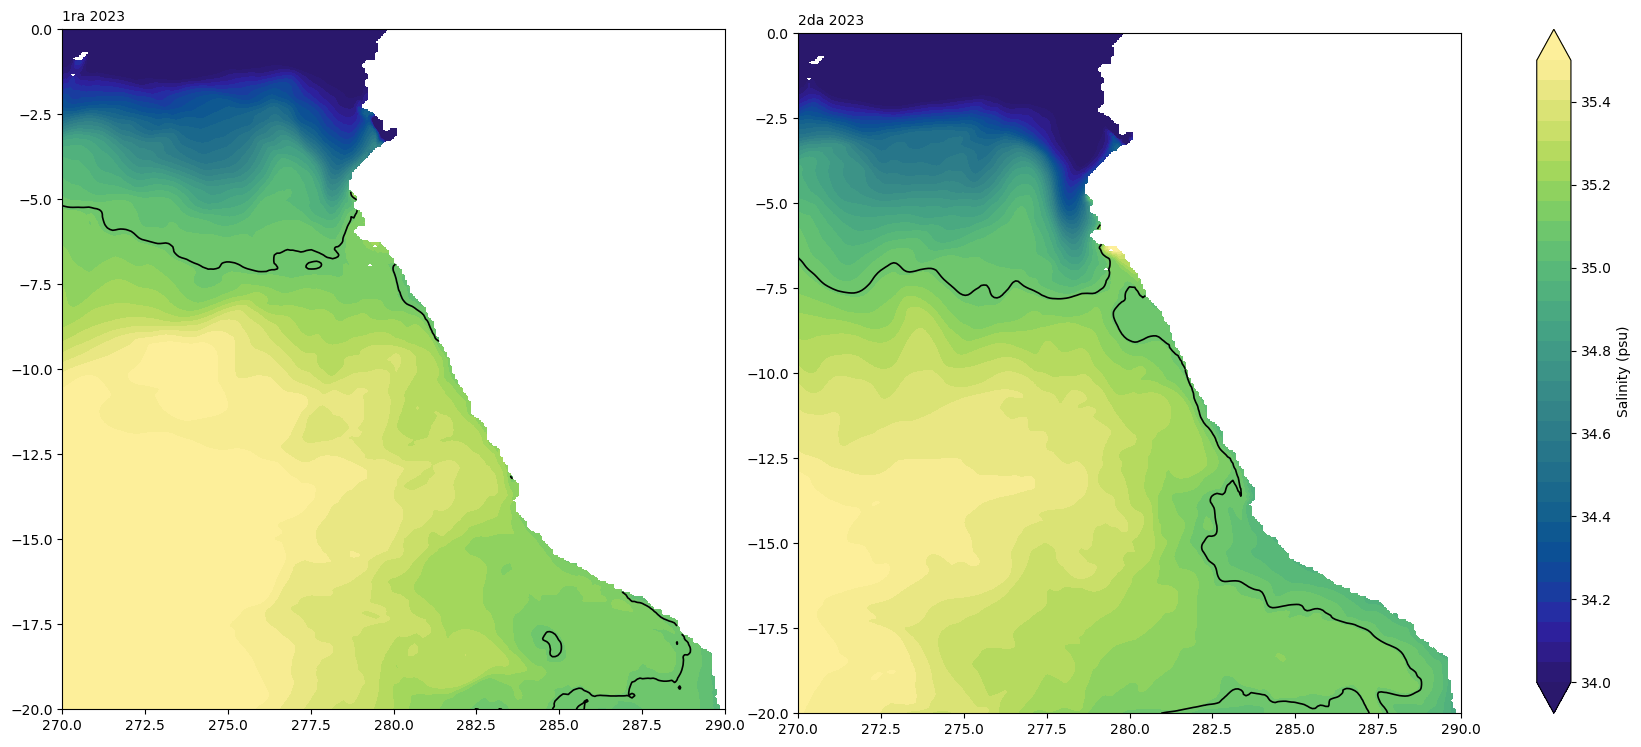

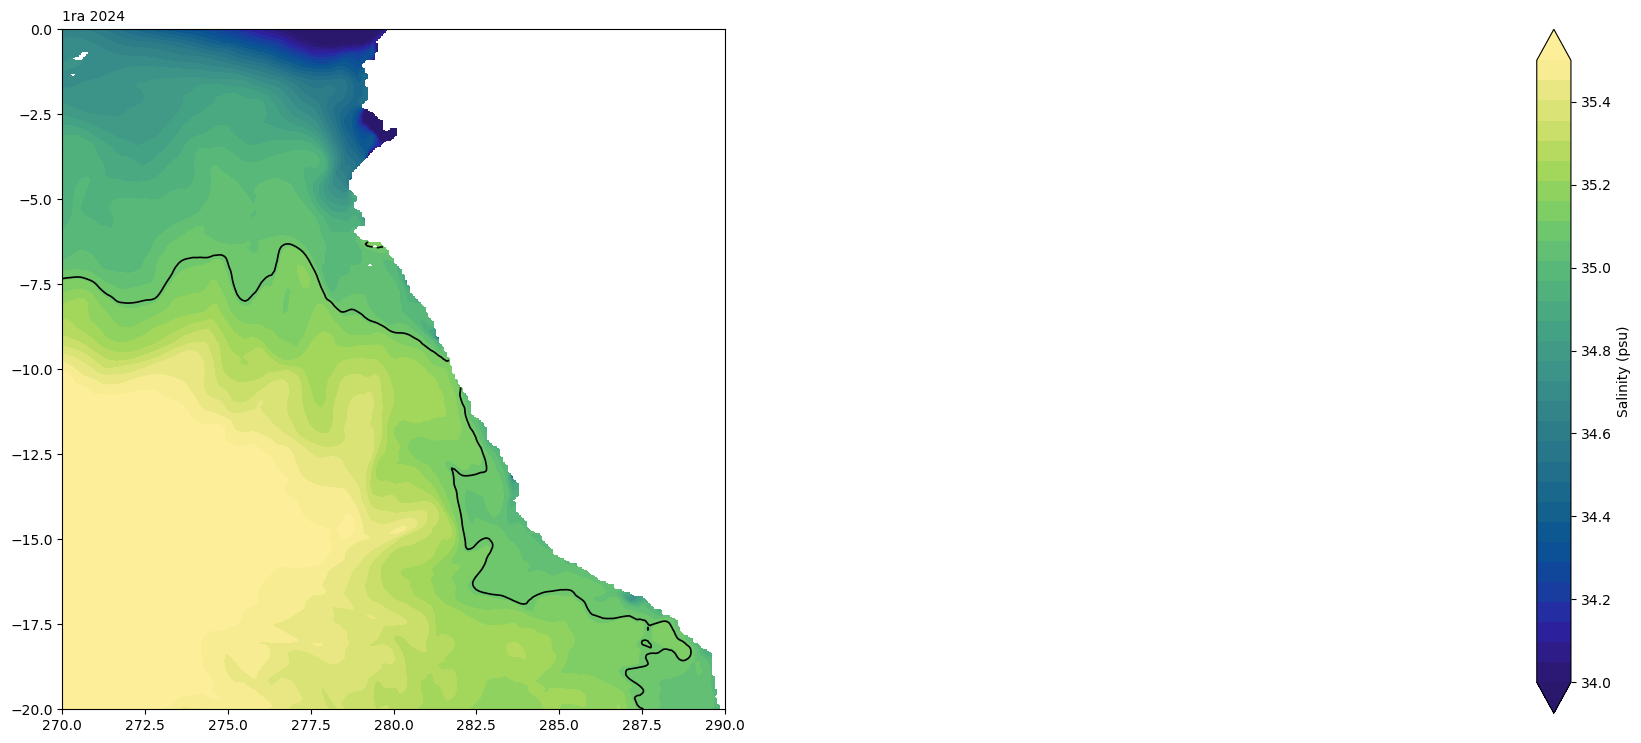

In [30]:

anios = sorted(set(int(re.search(r"(\d{4})", f.name).group(1)) for f in archivos_ordenados))

#anios = [2015, 2016, 2017]
levels = np.linspace(34, 35.5, 32)
ticks = np.arange(34, 35.5, 0.2)

for anio in anios:
    fig = plt.figure(figsize=(16, 8))

    axes = [plt.axes([0.05, 0.055, 0.45, 0.85]), plt.axes([0.55, 0.05, 0.45, 0.85])]

    for j, temporada in enumerate(["1ra", "2da"]):
        fname = next((f for f in archivos_ordenados if f"_{temporada}-{anio}" in f.name), None)
        if fname is None:
            axes[j].axis("off")
            continue

        ds = xr.open_dataset(fname)
        sal_mean = ds["salinity"].mean("time")

        cf = axes[j].contourf(
            ds["lon"], ds["lat"], sal_mean,
            levels=levels, cmap=cmocean.cm.haline, extend="both"
        )
        axes[j].contour(
            ds["lon"], ds["lat"], sal_mean,
            levels=[35.1], colors="black", linewidths=1.2
        )
        axes[j].set_title(f"{temporada} {anio}", fontsize=10, loc="left")

    fig.colorbar(cf, ax=axes, orientation="vertical", fraction=0.03, pad=0.05, ticks=ticks, label="Salinity (psu)")
    plt.show()

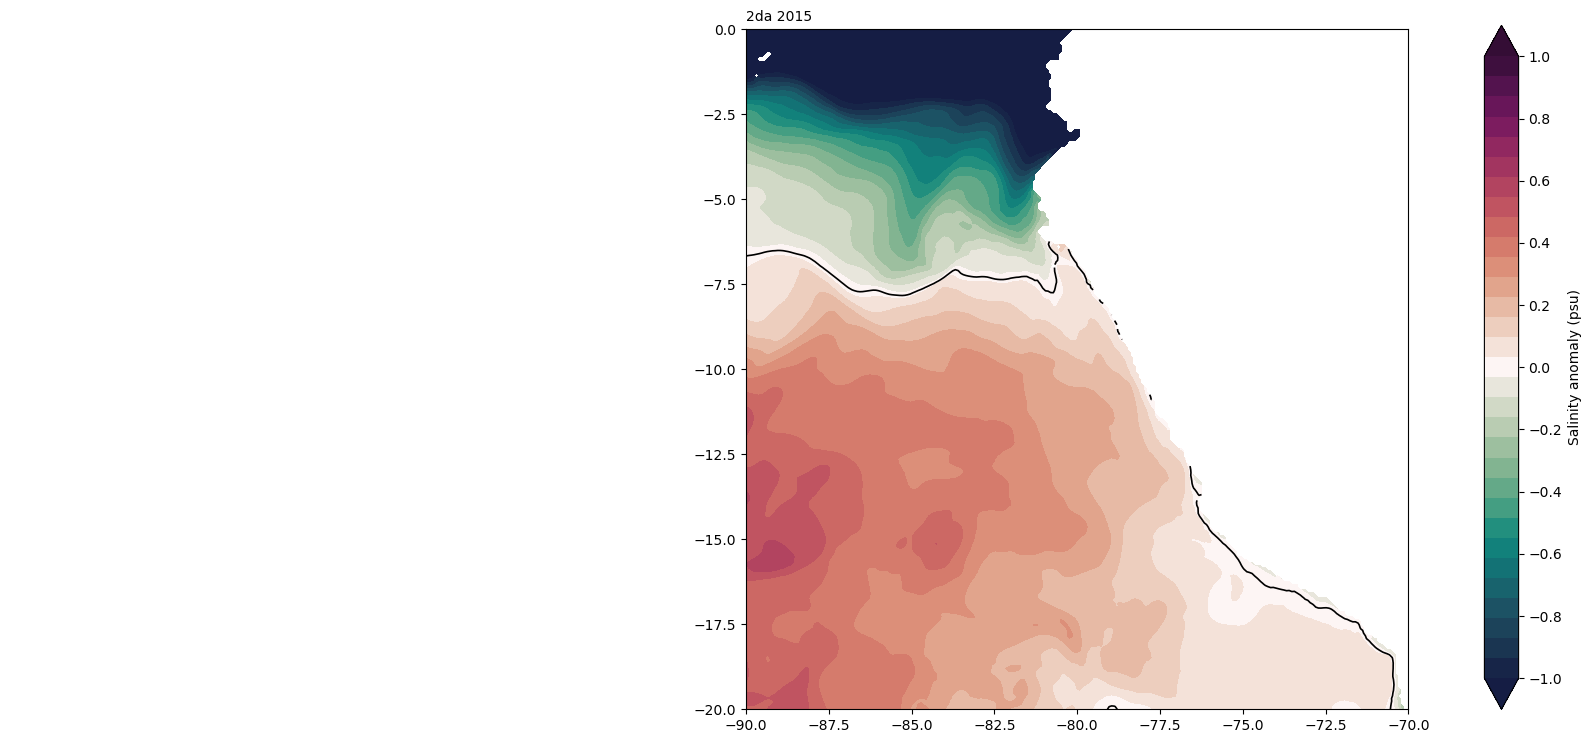

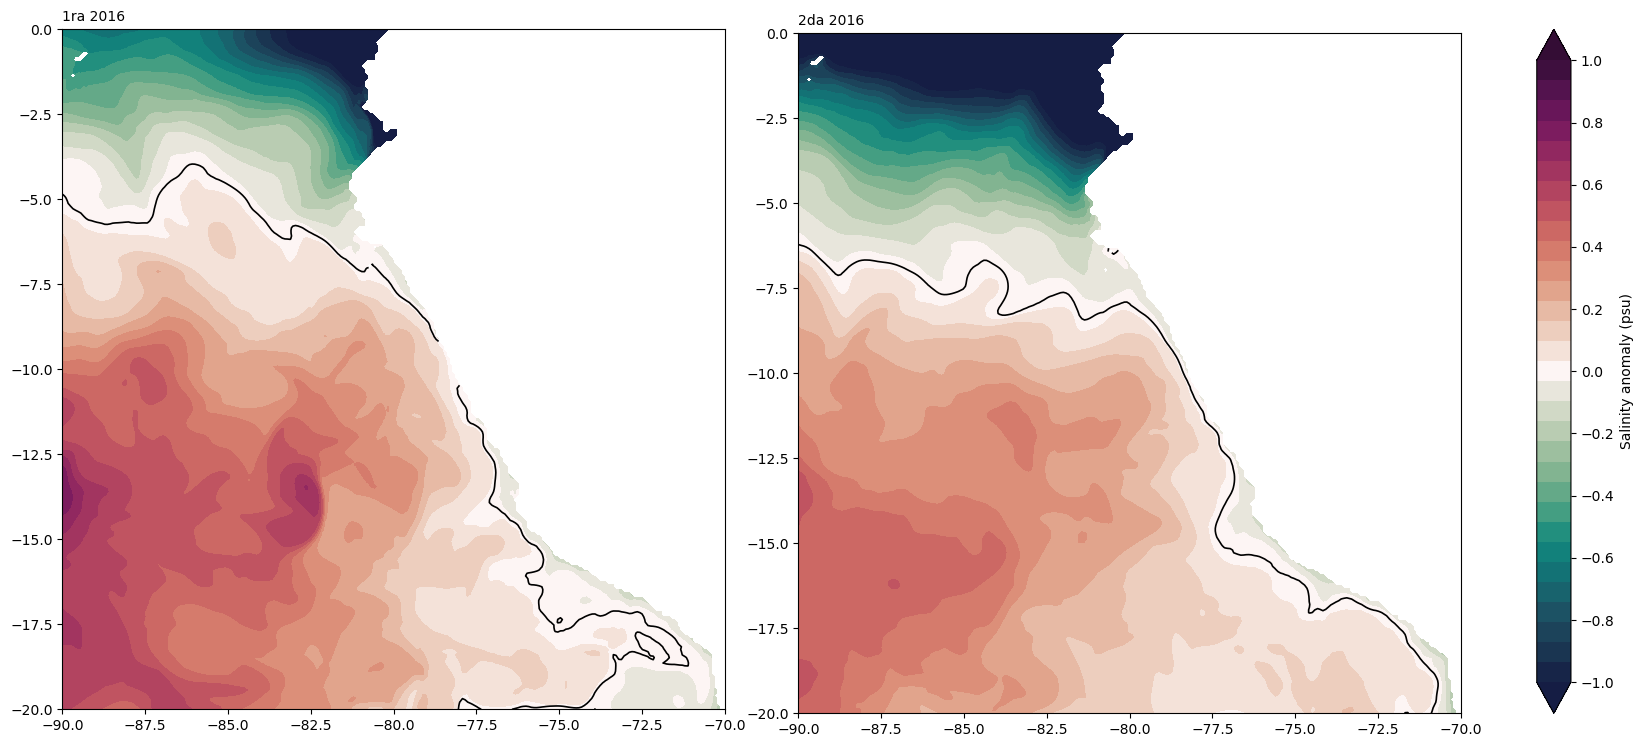

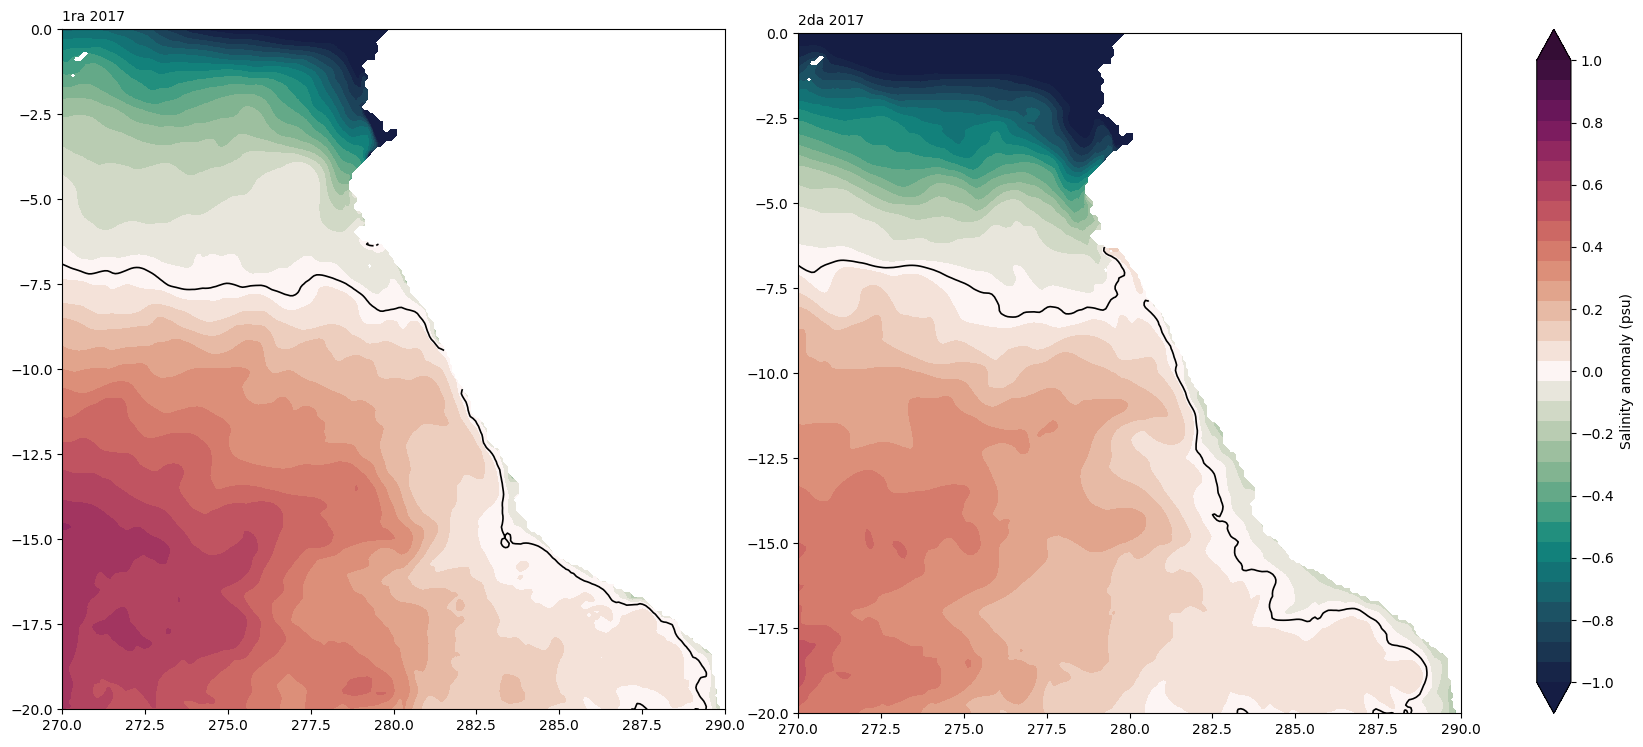

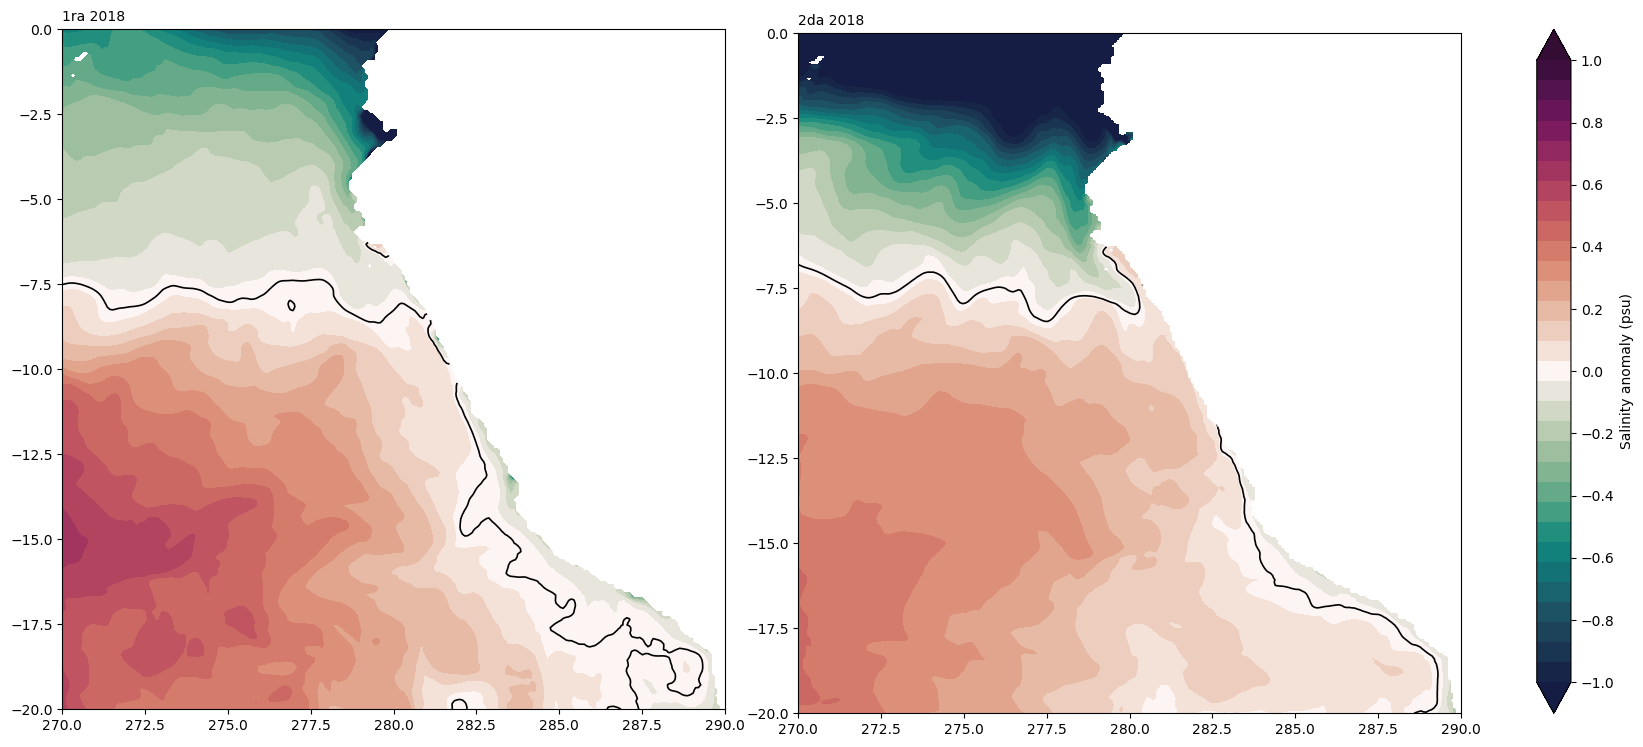

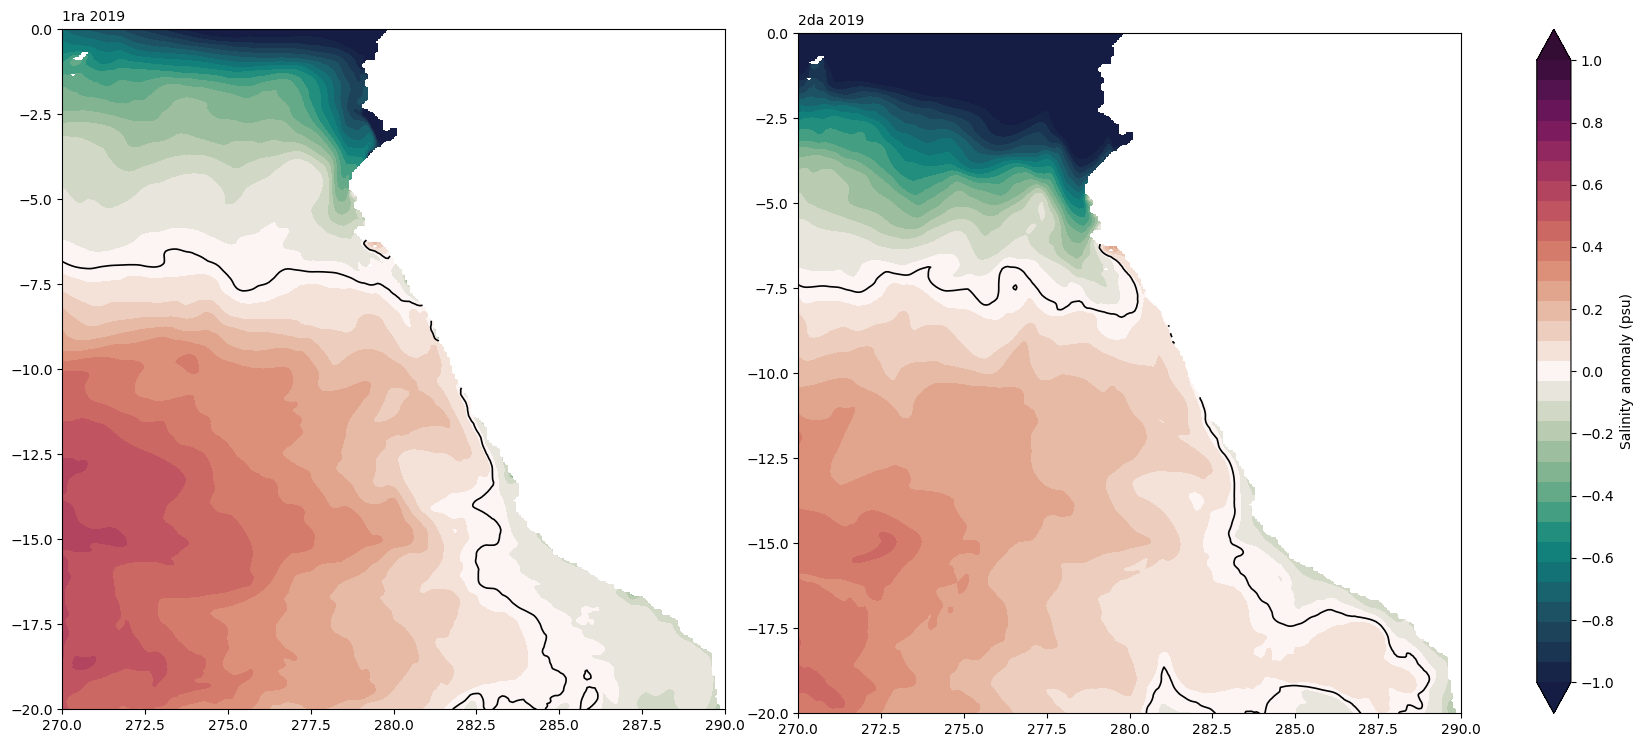

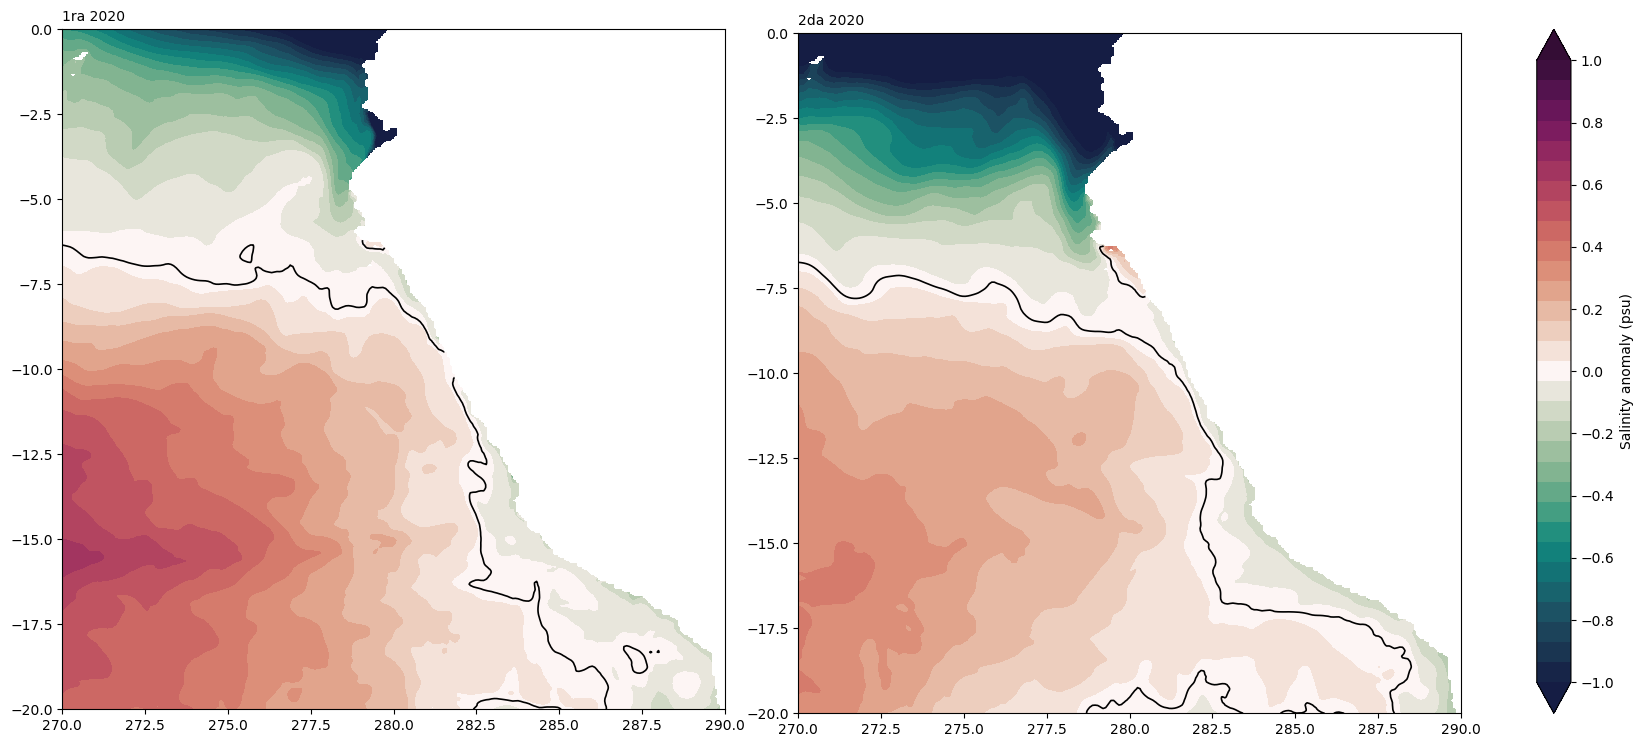

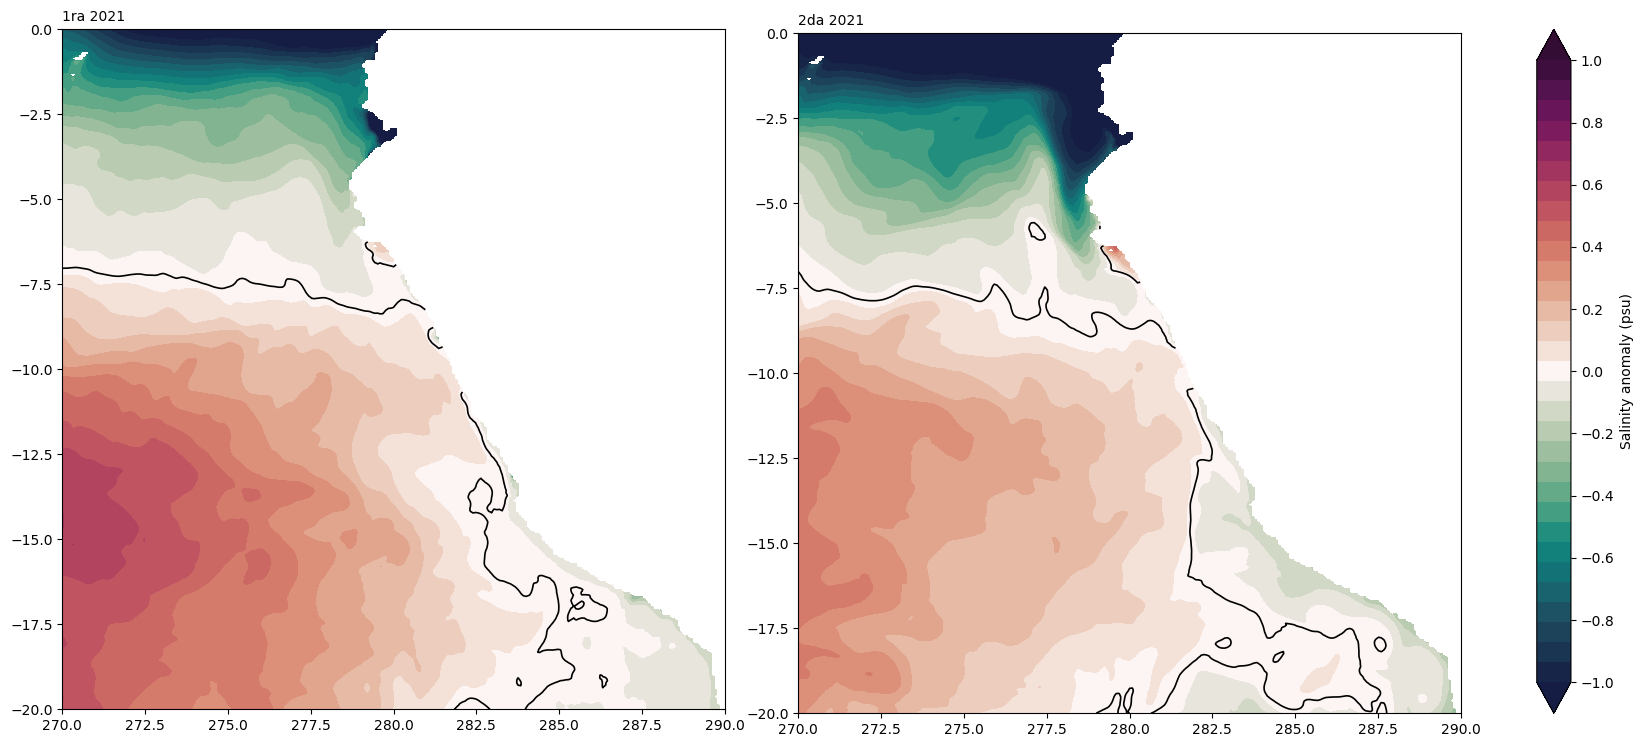

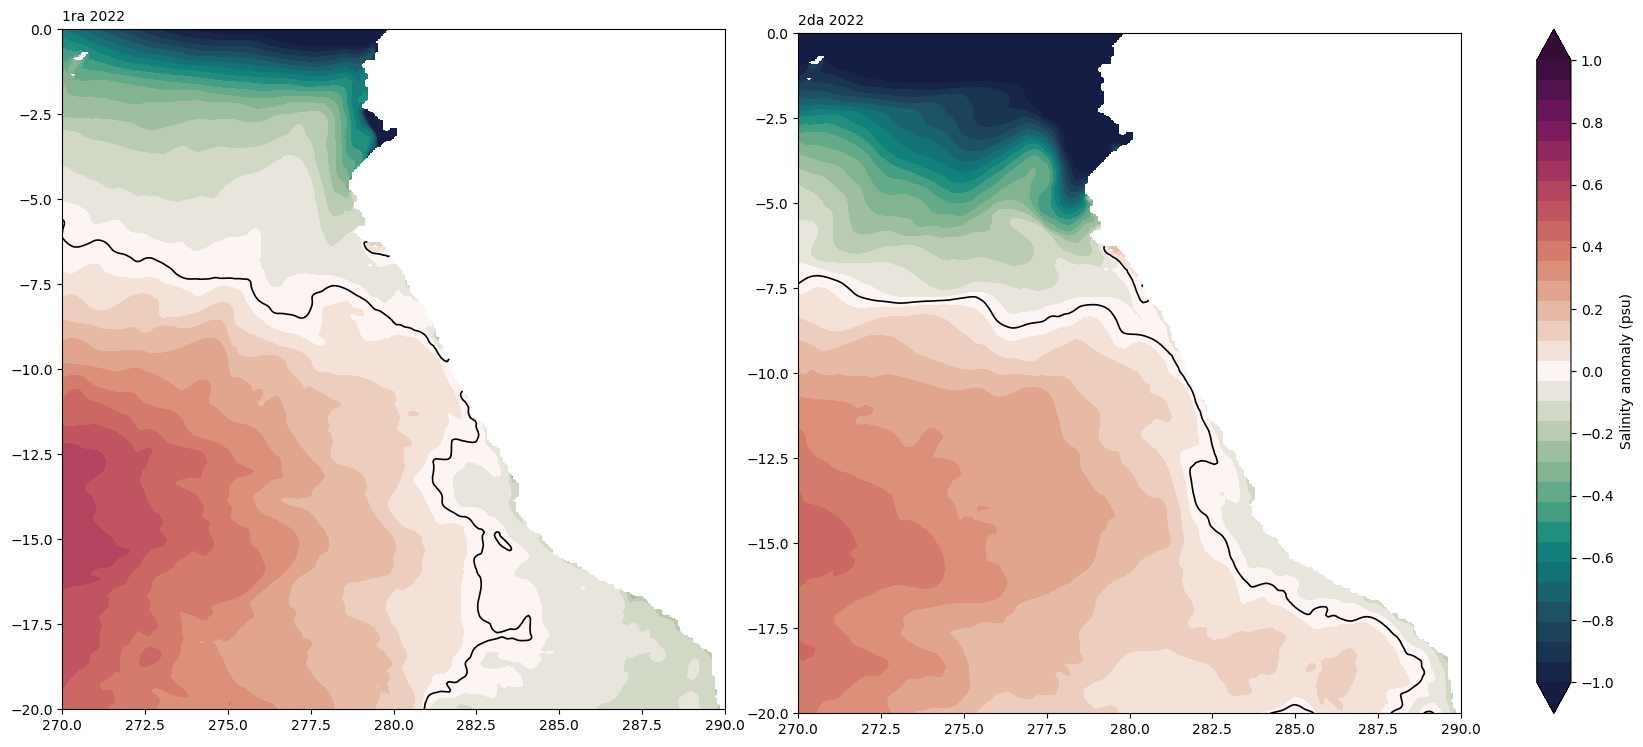

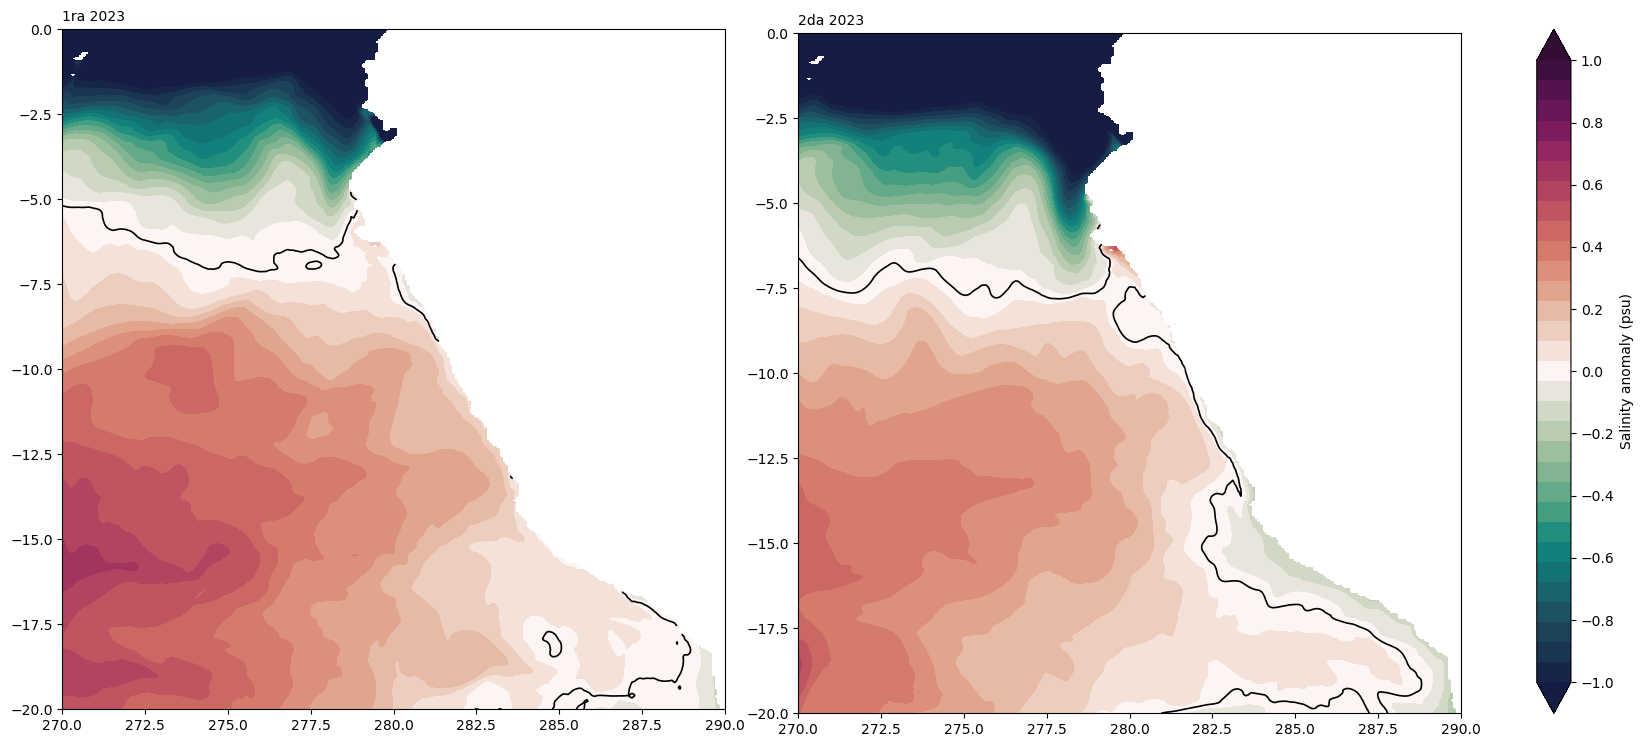

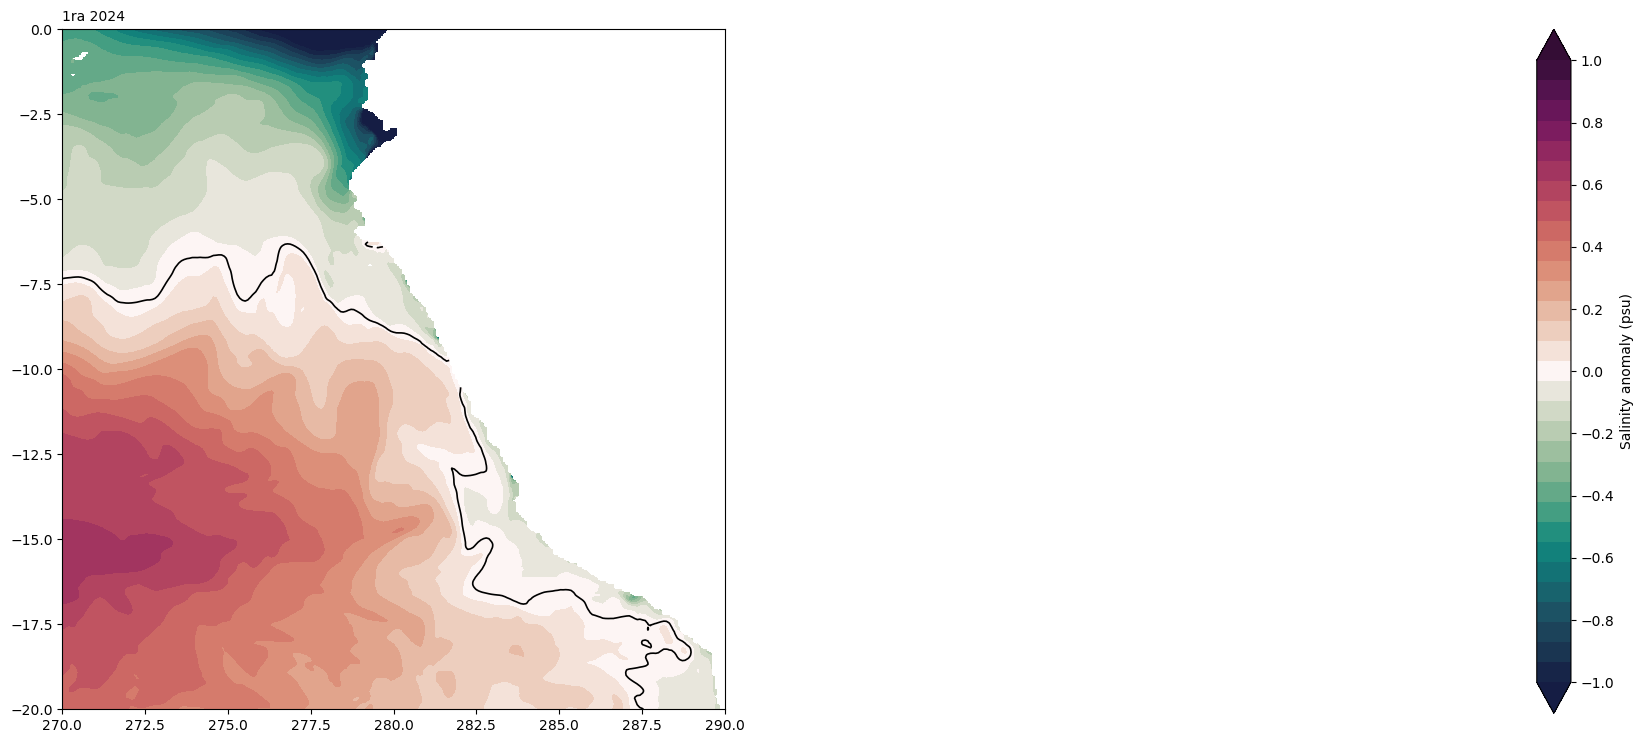

In [32]:
## anomalias respecto a 35.1 


levels = np.linspace(-1.0, 1.0, 32)  # rango de anomalías
ticks = np.arange(-1.0, 1.1, 0.2)

for anio in anios:
    fig = plt.figure(figsize=(16, 8))
    axes = [plt.axes([0.05, 0.055, 0.45, 0.85]), plt.axes([0.55, 0.05, 0.45, 0.85])]

    for j, temporada in enumerate(["1ra", "2da"]):
        fname = next((f for f in archivos_ordenados if f"_{temporada}-{anio}" in f.name), None)
        if fname is None:
            axes[j].axis("off")
            continue

        ds = xr.open_dataset(fname)
        sal_mean = ds["salinity"].mean("time") - 35.1  # <-- anomalía respecto a 35.1

        cf = axes[j].contourf(
            ds["lon"], ds["lat"], sal_mean,
            levels=levels, cmap=cmocean.cm.curl, extend="both"
        )

        axes[j].contour(
            ds["lon"], ds["lat"], sal_mean,
            levels=[0], colors="black", linewidths=1.2
        )

        axes[j].set_title(f"{temporada} {anio}", fontsize=10, loc="left")

    fig.colorbar(cf, ax=axes, orientation="vertical",
                 fraction=0.03, pad=0.05, ticks=ticks, label="Salinity anomaly (psu)")
    plt.show()